# **Turma de Pós-Graduação de Ciência de Dados**

**prof: Sérgio Assunção Monteiro, DSc**

**Disciplina: Aplicações de Finanças**

**Abordagem Estatística**

# **Aula 01 - Parte 1**

In [ ]:
# Instalando o yahoo finance
!pip install yfinance --upgrade --no-cache-dir

In [ ]:
!pip install requests --upgrade --no-cache-dir

In [ ]:
pip install --upgrade pandas

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf #Instalando e importando a API no código
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
import requests
url = "https://investnews.com.br/financas/veja-a-lista-completa-dos-bdrs-disponiveis-para-pessoas-fisicas-na-b3/"
r = requests.get(url)
html = r.text
df_nomes_tickers = pd.read_html(html, header=0)[0]
df_nomes_tickers.head(10)

,EMPRESA,CÓDIGO,SETOR,PAÍS DE ORIGEM
0,3M,MMMC34,Indústria diversificada,EUA
1,AB INBEV,ABUD34,Bebidas,Bélgica
2,ABB LTD,A1BB34,Industrial,Switzerland
3,ABBOTT,ABTT34,Farmacêuticos,EUA
4,ABBVIE,ABBV34,Medicamentos e Outros Produtos,EUA
5,ABIOMED INC,A1BM34,Saúde,EUA
6,ACTIVISION,ATVI34,Tecnologia,EUA
7,ADOBE INC,ADBE34,Tecnologia,EUA
8,ADVANCE AUTO PARTS INC,A1AP34,Peças Automotivas,EUA
9,ADVANCED MIC,A1MD34,Tecnologia,EUA


In [ ]:
with pd.option_context('display.max_rows',10):
  print(df_nomes_tickers)

           EMPRESA  ... PAÍS DE ORIGEM
0               3M  ...            EUA
1         AB INBEV  ...        Bélgica
2          ABB LTD  ...    Switzerland
3           ABBOTT  ...            EUA
4           ABBVIE  ...            EUA
..             ...  ...            ...
701         ORACLE  ...            EUA
702  RAYTHEON TECH  ...            EUA
703   SCHLUMBERGER  ...            EUA
704        TIFFANY  ...            EUA
705     US BANCORP  ...            EUA

[706 rows x 4 columns]


# **Importação dos dados**

In [ ]:
import pandas as pd
import matplotlib.pylab as plt
import yfinance as yf
import warnings
import matplotlib
import statsmodels.api as sm

In [ ]:
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'G'

In [ ]:
# importar pacotes necessários
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dados_series = yf.download("PETR4.SA", start="2018-01-01", end="2022-01-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
with pd.option_context('display.max_rows',10):
  print(dados_series)

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2021-08-02  27.200001  27.410000  26.370001  26.410000  22.188286   70528800
2021-08-03  26.360001  26.870001  25.790001  26.850000  22.557951   71850400
2021-08-04  26.549999  26.770000  25.950001  26.280001  22.079067   87970600
2021-08-05  28.750000  28.980000  28.059999  28.350000  23.818172  223915900
2021-08-06  28.500000  28.540001  28.020000  28.389999  23.851776   51106100
...               ...        ...        ...        ...        ...        ...
2021-12-23  28.330000  28.420000  28.150000  28.330000  28.330000   28713600
2021-12-27  28.320000  28.780001  28.150000  28.750000  28.750000   44227900
2021-12-28  29.010000  29.280001  28.700001  28.780001  28.780001   30688100
2021-12-29  28.700001  28.900000  28.420000  28.540001  28.540001   35508400
2021-12-30  28.549999  28.700001  28.389999  28.450001  28.450001   43229100

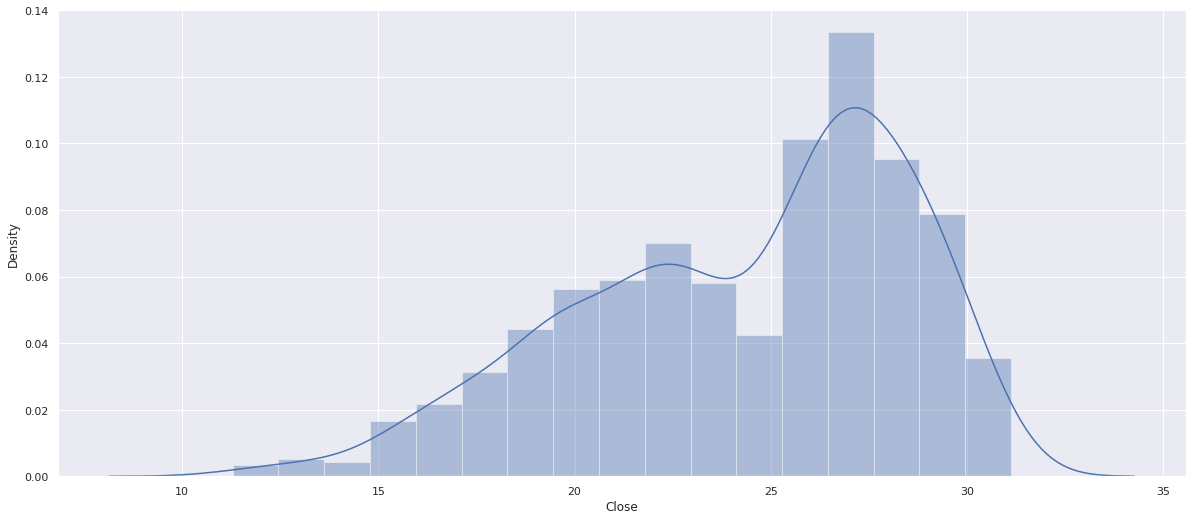

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.distplot(dados_series['Close'].dropna())

In [ ]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'colab'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery']

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
dados_grafico = [go.Scatter(x=dados_series.index, y=dados_series['Close'])]
py.iplot(dados_grafico)

# **Decomposição da Série**

In [ ]:
#Selecionar apenas os dados referentes ao preço de fechamento
df = dados_series.drop(['Open','High', 'Low', 'Adj Close', 'Volume'], axis=1) 

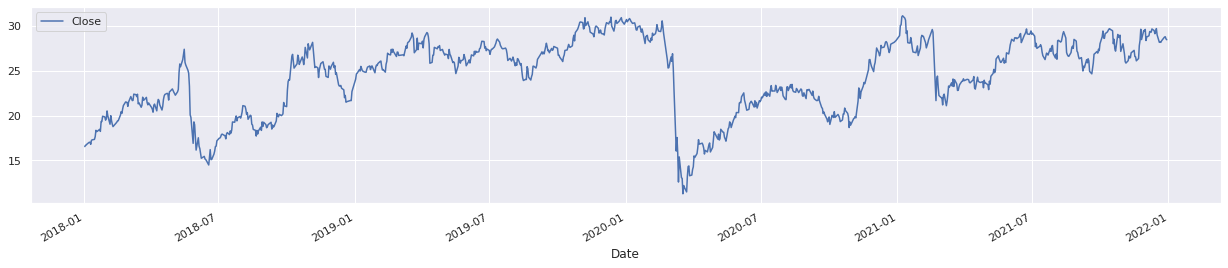

In [ ]:
df.plot(figsize = (19, 4)) 
plt.show()

In [ ]:
with pd.option_context('display.max_rows',10):
  print(df)

                Close
Date                 
2018-01-02  16.549999
2018-01-03  16.700001
2018-01-04  16.730000
2018-01-05  16.830000
2018-01-08  17.030001
...               ...
2021-12-23  28.330000
2021-12-27  28.750000
2021-12-28  28.780001
2021-12-29  28.540001
2021-12-30  28.450001

[989 rows x 1 columns]


In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

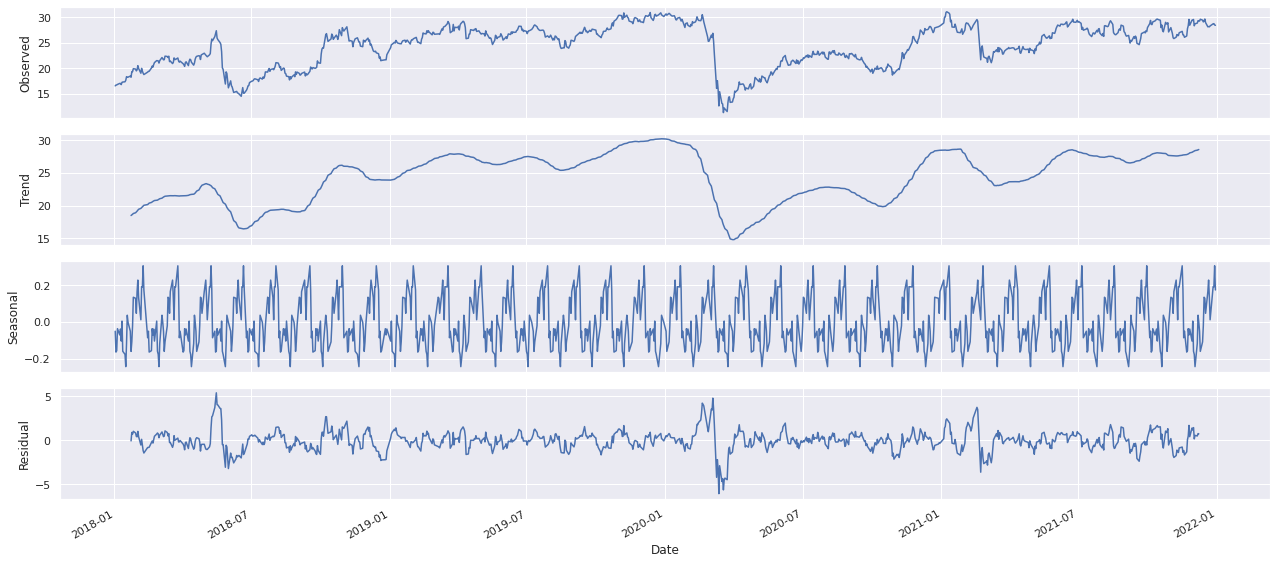

In [ ]:
decomposition = sm.tsa.seasonal_decompose(x=df, freq=30, model='additive')
fig = decomposition.plot()
plt.show()

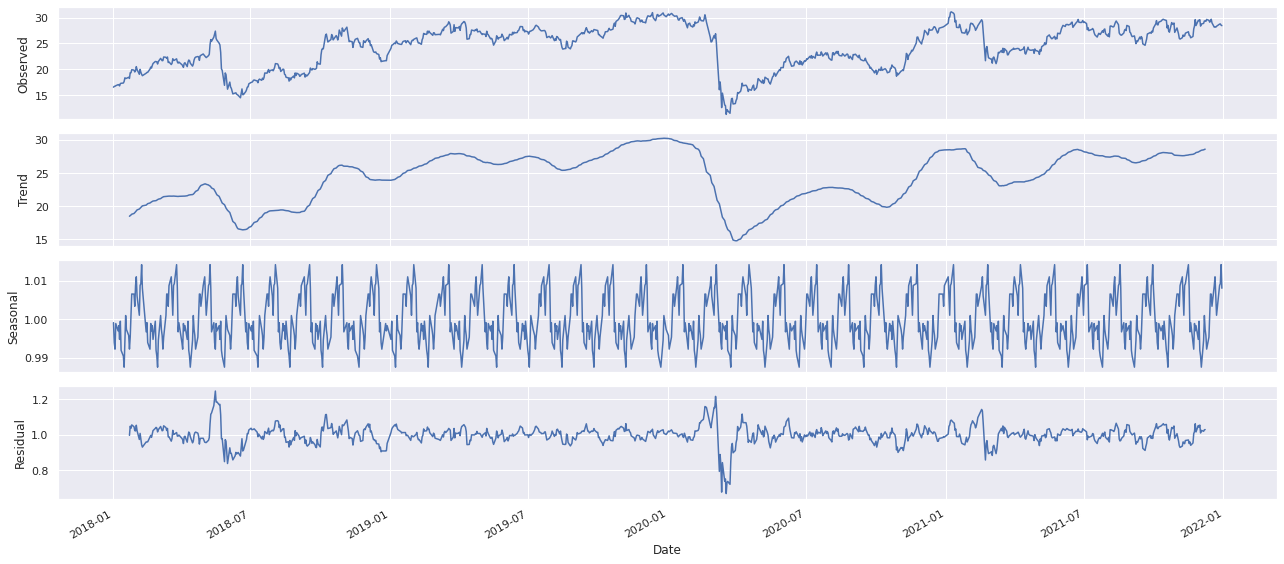

In [ ]:
decomposition = sm.tsa.seasonal_decompose(x=df, freq=30, model='multiplicative')
fig = decomposition.plot()
plt.show()

# **Modelos de Médias Móveis (Suavização)**

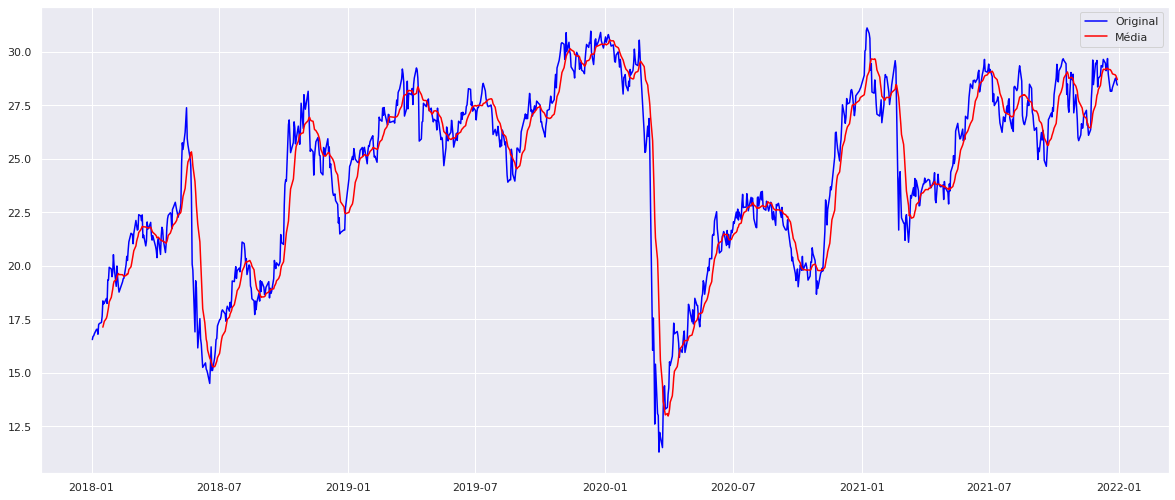

In [ ]:
mm = pd.DataFrame.rolling(df,window=12,center=False).mean()
orig = plt.plot(df, color='blue',label='Original')
mean = plt.plot(mm, color='red',label='Média')
plt.legend(loc='best')
plt.show()

In [ ]:
# aplica o método para obter previsões para até 12 passos à frente (horizonte)
def medias_moveis(series, n):
    '''
        Calcula a média da últimas n observações
    '''
    return np.average(series[-n:])

In [ ]:
medias_moveis(df, 12) # Previsão 12 passos à frente

28.705833594004314

# **ARIMA(p,q,d)**

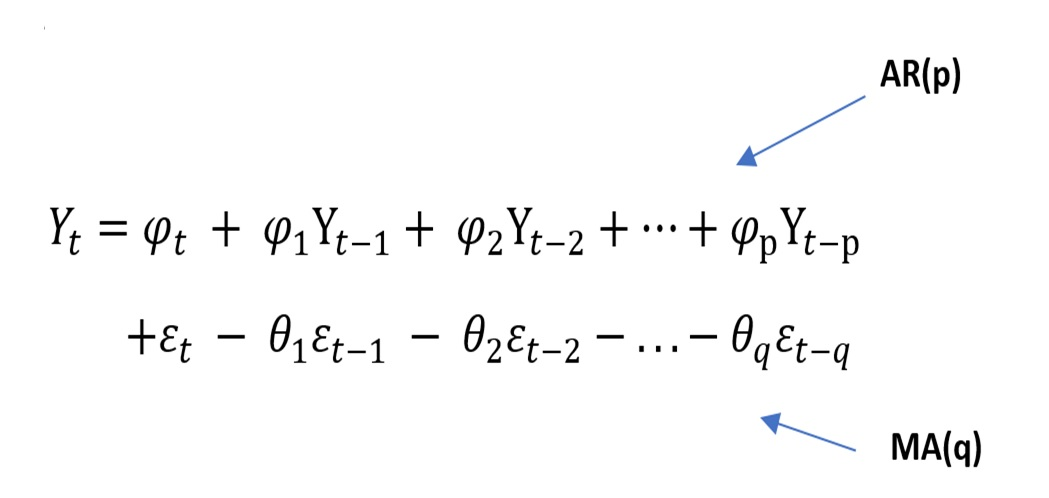

In [ ]:
dados_treinamento, dados_teste = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
dados_treinamento = dados_treinamento['Close'].values
dados_teste = dados_teste['Close'].values
historico = [x for x in dados_treinamento]
modelo_preditivo = []

In [ ]:
N_observacoes_teste = len(dados_teste)
for ponto_de_teste in range(N_observacoes_teste):
  modelo = ARIMA(historico, order=(1,1,0))  
  modelo_fit = modelo.fit(disp=0)
  saida = modelo_fit.forecast()
  yhat = saida[0]
  modelo_preditivo.append(yhat)
  valor_real_teste = dados_teste[ponto_de_teste]
  historico.append(valor_real_teste)

In [ ]:
erroMSE = mean_squared_error(dados_teste, modelo_preditivo)
print('O Erro Médio Quadrado (MSE) é {}'.format(erroMSE))

O Erro Médio Quadrado (MSE) é 0.5198217275555103


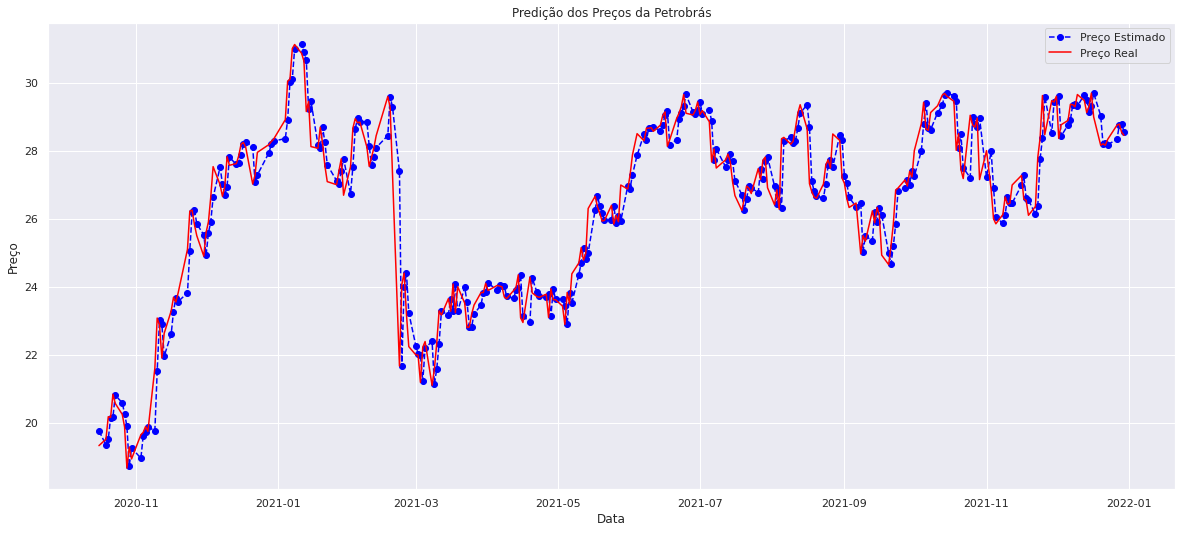

In [ ]:
intervalo_dos_dados_de_teste = df[int(len(df)*0.7):].index
plt.plot(intervalo_dos_dados_de_teste, 
         modelo_preditivo, 
         color='blue', 
         marker='o', 
         linestyle='dashed',
         label='Preço Estimado')

plt.plot(intervalo_dos_dados_de_teste, 
         dados_teste, 
         color='red', 
         label='Preço Real')

plt.title('Predição dos Preços da Petrobrás')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.show()

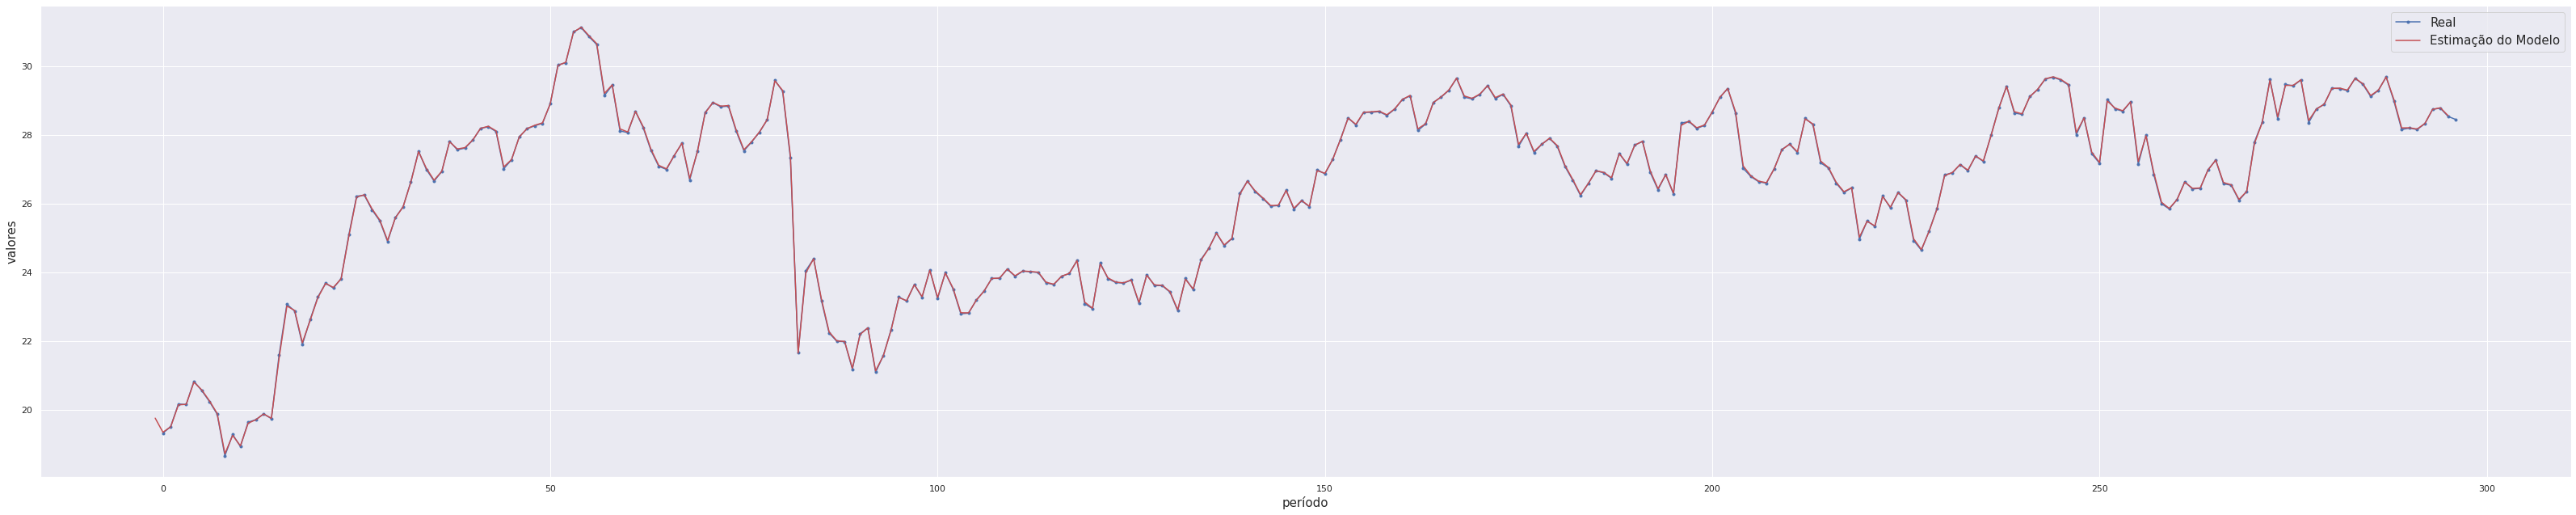

In [ ]:
look_back = 1
plt.figure(figsize=(50,10))
plt.plot(list(np.arange(len(intervalo_dos_dados_de_teste))), 
         dados_teste, 
         marker='.', 
         label="Real")

plt.plot(list(np.arange(len(intervalo_dos_dados_de_teste))-look_back), 
         modelo_preditivo, 
         'r',label="Estimação do Modelo")
plt.ylabel('valores', size=15)
plt.xlabel('período', size=15)
plt.legend(fontsize=15)
plt.show()

In [ ]:
modelo = ARIMA(historico, order=(1,1,0))  
modelo_fit = modelo.fit(disp=0)
saida = modelo_fit.forecast()
yhat = saida[0]
print('Valor previsto:{}'.format(yhat))

Valor previsto:[28.46619171]
